In [1]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

In [8]:
projected = pca.fit_transform(digits.data)

In [9]:
projected.shape

(1797, 2)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/tmp/ipykernel_12573/325775134.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


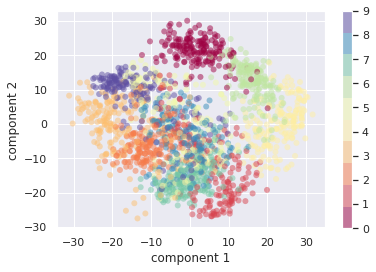

In [12]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

In [13]:
pca = PCA().fit(digits.data)

In [15]:
import numpy as np

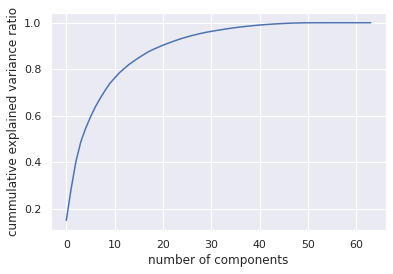

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance ratio')
plt.show()

In [17]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks': []},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

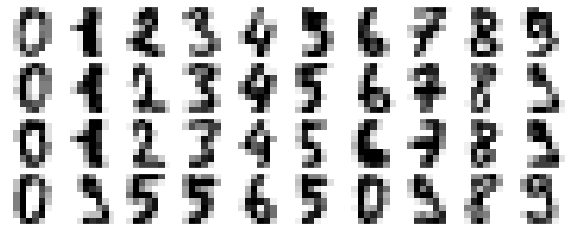

In [18]:
plot_digits(digits.data)

In [19]:
np.random.seed(42)

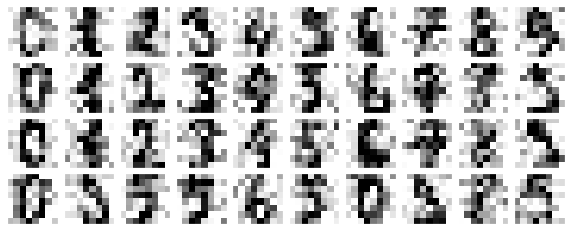

In [20]:
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [26]:
pca = PCA(0.).fit(noisy)

In [27]:
pca.n_components_

18

In [28]:
components = pca.transform(noisy)

In [29]:
filtered = pca.inverse_transform(components)

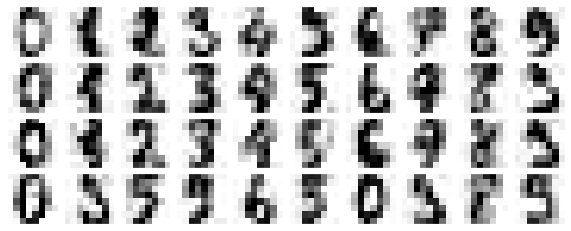

In [30]:
plot_digits(filtered)

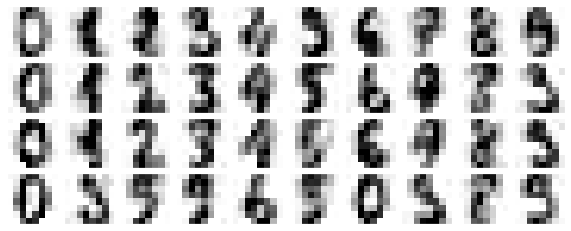

In [32]:
pca = PCA(0.5).fit(noisy)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [34]:
from sklearn.datasets import fetch_lfw_people

In [35]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [36]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [37]:
faces.images.shape

(1348, 62, 47)

In [39]:
# from sklearn.decomposition import RandomizedPCA

In [42]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=False)

In [43]:
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')